In [ ]:
!kaggle competitions list --category gettingStarted

In [ ]:
!kaggle competitions download store-sales-time-series-forecasting

# Linear Regression with Time Series
Use two features unique to time series: lags and time steps

https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series

In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
data_dir = Path('input/ts-course-data/')
comp_dir = Path('input/store-sales-time-series-forecasting/')

## Lesson Content
**Time-Step**
* Time-step features let you model ***time dependence***.
* A series is time-dependent if its values can be predicted from the time they occurred.
* Example: Sales later in the month are generally higher than sales earlier in the month

**Lag Features**
* Lag features let you model ***serial dependence***.
* A series has serial dependence when an observation can be predicted from previous observations.
* Example: High sales on one day usually mean high sales the next day

In [4]:
book_sales = pd.read_csv(
    data_dir / 'book_sales.csv',
    index_col='Date',
    parse_dates=['Date']
).drop('Paperback', axis=1)

# Two features unique to time series: time-step features and lag features
book_sales['Time'] = np.arange(len(book_sales.index))
book_sales['Lag_1'] = book_sales['Hardcover'].shift(1)
book_sales = book_sales.reindex(columns=['Hardcover', 'Time', 'Lag_1'])

book_sales.head()

,Hardcover,Time,Lag_1
Date,,,
2000-04-01,139,0,NaN
2000-04-02,128,1,139.0
2000-04-03,172,2,128.0
2000-04-04,139,3,172.0
2000-04-05,191,4,139.0


### Time-Step
* Time-step features let you model ***time dependence***.
* A series is time-dependent if its values can be predicted from the time they occurred.
* Example: Sales later in the month are generally higher than sales earlier in the month

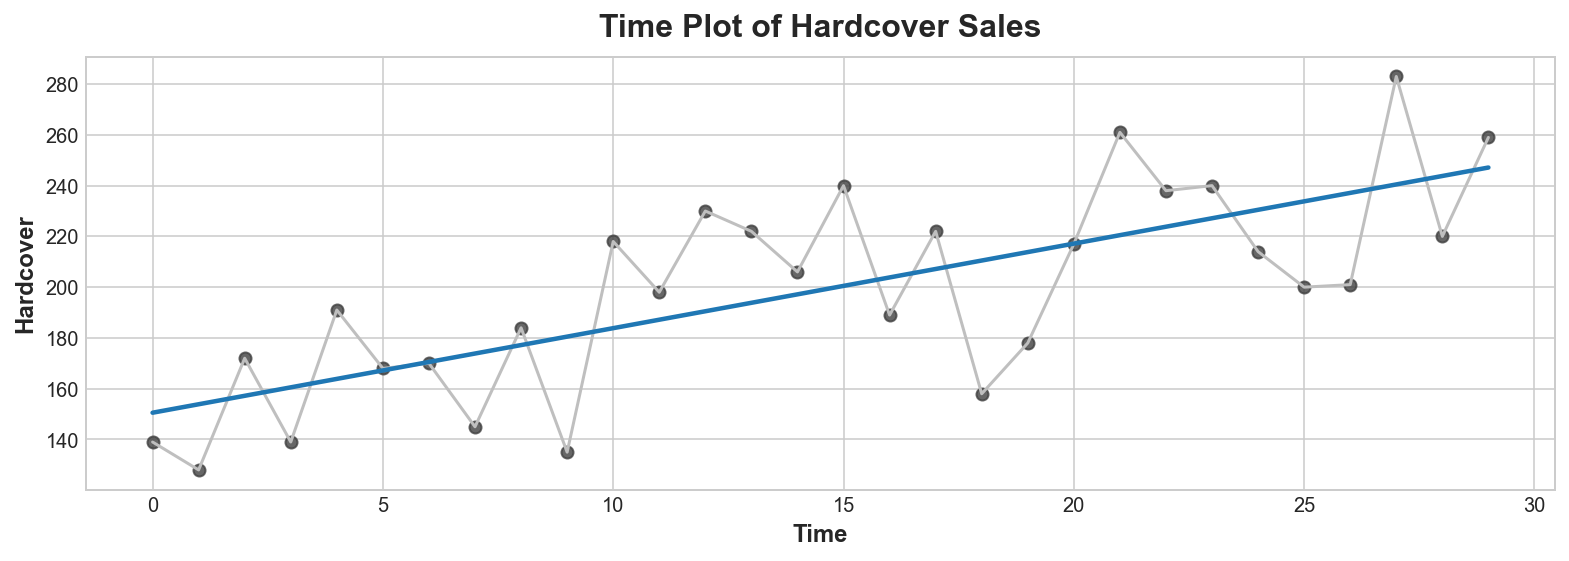

In [5]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=book_sales, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=book_sales, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');

### Lag Features

* Lag features let you model ***serial dependence***.
* A series has serial dependence when an observation can be predicted from previous observations.
* Example: High sales on one day usually mean high sales the next day

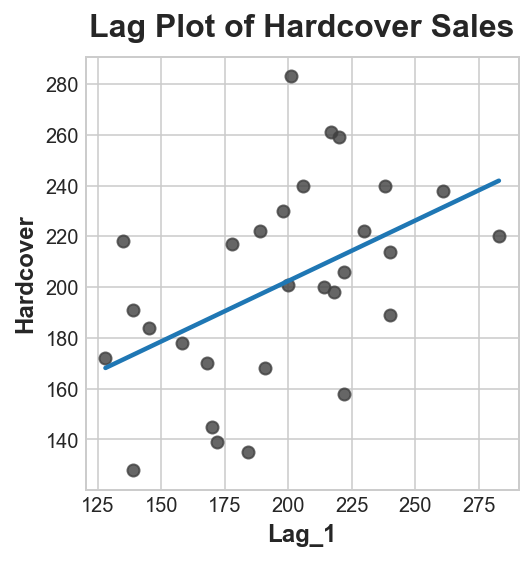

In [6]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Hardcover', data=book_sales, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales');

### Example - Tunnel Traffic

In [7]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

In [11]:
# Load Tunnel Traffic dataset
tunnel = pd.read_csv(
    data_dir / 'tunnel.csv', 
    index_col='Day',
    parse_dates=['Day']
)

# By default, Pandas creates a `DatetimeIndex` with dtype `Timestamp`
# (equivalent to `np.datetime64`, representing a time series as a
# sequence of measurements taken at single moments. A `PeriodIndex`,
# on the other hand, represents a time series as a sequence of
# quantities accumulated over periods of time. Periods are often
# easier to work with, so that's what we'll use in this course.
tunnel = tunnel.to_period()

tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


#### Time-Step Feature

In [12]:
df = tunnel.copy()
df['Time'] = np.arange(len(tunnel.index))
df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [30]:
from sklearn.linear_model import LinearRegression

# Training data
X = df.loc[:, ['Time']] # features
y = df.loc[:, 'NumVehicles'] # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as training data
y_pred = pd.Series(model.predict(X), index=X.index)

Text(0.5, 1.0, 'Time Plot of Tunnel Traffic')

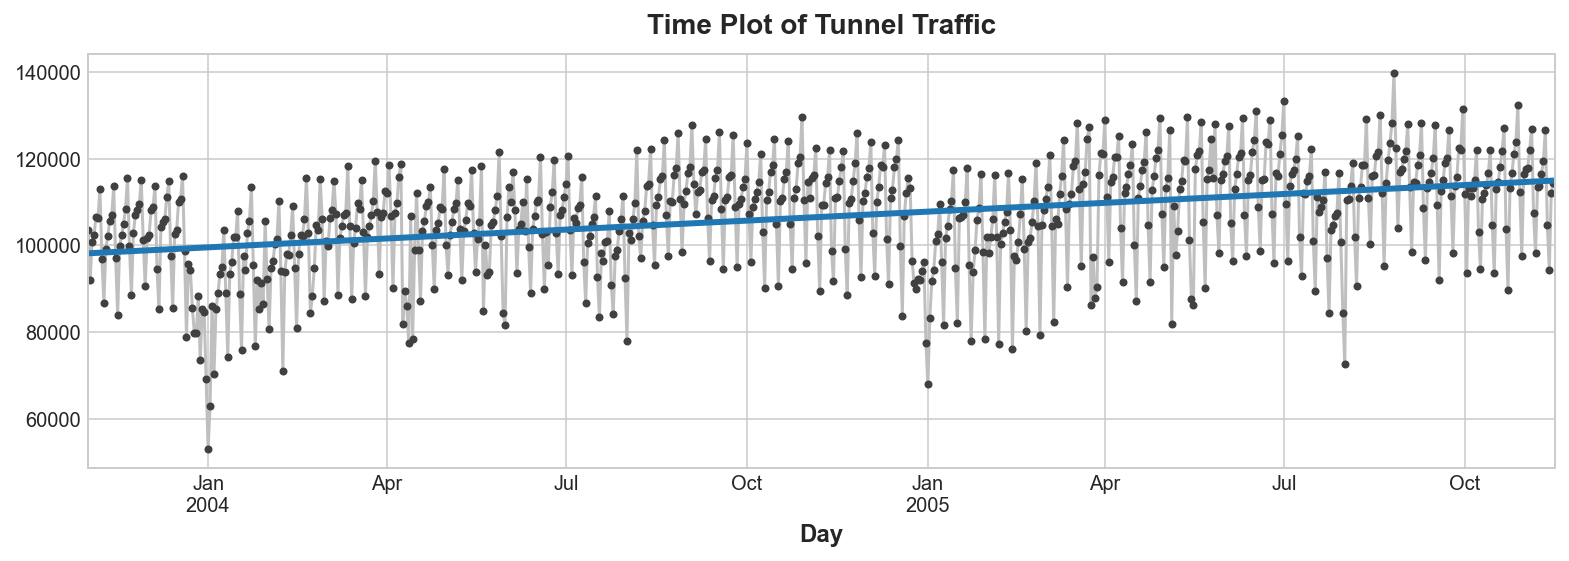

In [14]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic')

In [34]:
print(model.coef_)
print(model.intercept_)

# Vehicles = 22.5 * Time + 98176

[22.49744953]
98176.20634409295


#### Lag Feature

In [15]:
df['Lag_1'] = df['NumVehicles'].shift(1)
df.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [16]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True)
y = df.loc[:, 'NumVehicles']
y, X = y.align(X, join='inner')

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

Text(0.5, 1.0, 'Lag Plot of Tunnel Traffic')

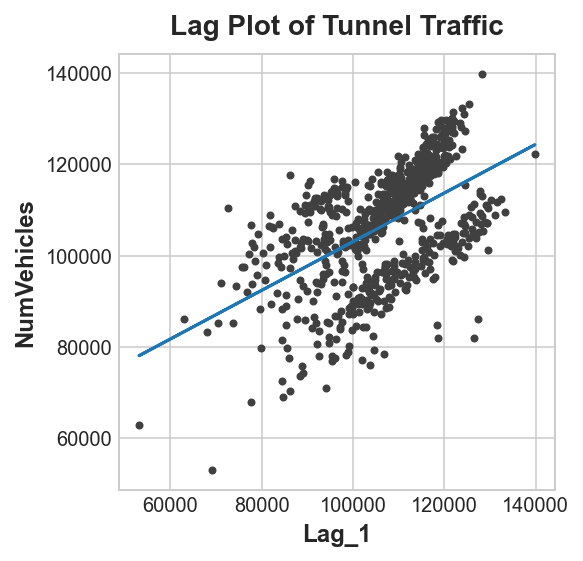

In [19]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic')

In [20]:
# shows how our forecasts now respond to the behavior of the series in the recent past

## Exercise: Forecasting Store Sales

In [21]:
ar = pd.read_csv(data_dir / 'ar.csv')
ar.head()

,ar1,ar2
0,0.541286,-1.234475
1,-1.692950,3.532498
2,-1.730106,-3.915508
3,-0.783524,2.820841
4,-1.796207,-1.084120


In [25]:
dtype = {
    'store_nbr': 'category',
    'family': 'category',
    'sales': 'float32',
    'onpromotion': 'uint64',
}

store_sales = pd.read_csv(
    comp_dir / 'train.csv',
    dtype=dtype,
    parse_dates=['date'],
    infer_datetime_format=True,
)

store_sales

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000000,0
1,1,2013-01-01,1,BABY CARE,0.000000,0
2,2,2013-01-01,1,BEAUTY,0.000000,0
3,3,2013-01-01,1,BEVERAGES,0.000000,0
4,4,2013-01-01,1,BOOKS,0.000000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.132996,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.552994,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729004,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000000,8


In [26]:
store_sales = store_sales.set_index('date').to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family'], append=True)
average_sales = store_sales.groupby('date').mean()['sales']

### Interpret linear regression with time dummy

Text(0.5, 1.0, 'Time Plot of Hardcover Sales')

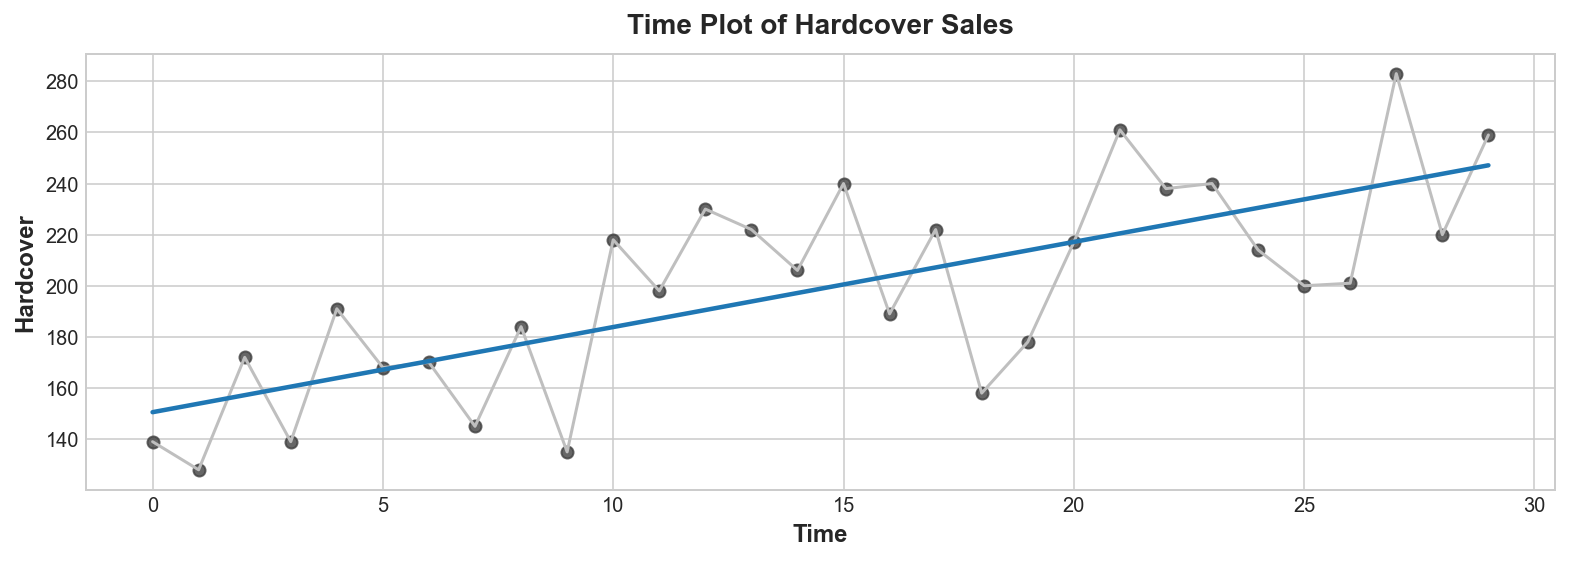

In [27]:
fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=book_sales, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=book_sales, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales')

In [36]:
X = book_sales.loc[:, ['Time']]
y = book_sales.loc[:, 'Hardcover']

model = LinearRegression()
model.fit(X, y)

print(model.coef_)
print(model.intercept_)

# Hardcover = 3.33*Time + 150.5
# On average, hardcover sales will increase by 19.98 over 6 days

[3.33058954]
150.53978494623658


### Interpret linear regression with a lag feature

Text(0.5, 1.0, 'Series 2')

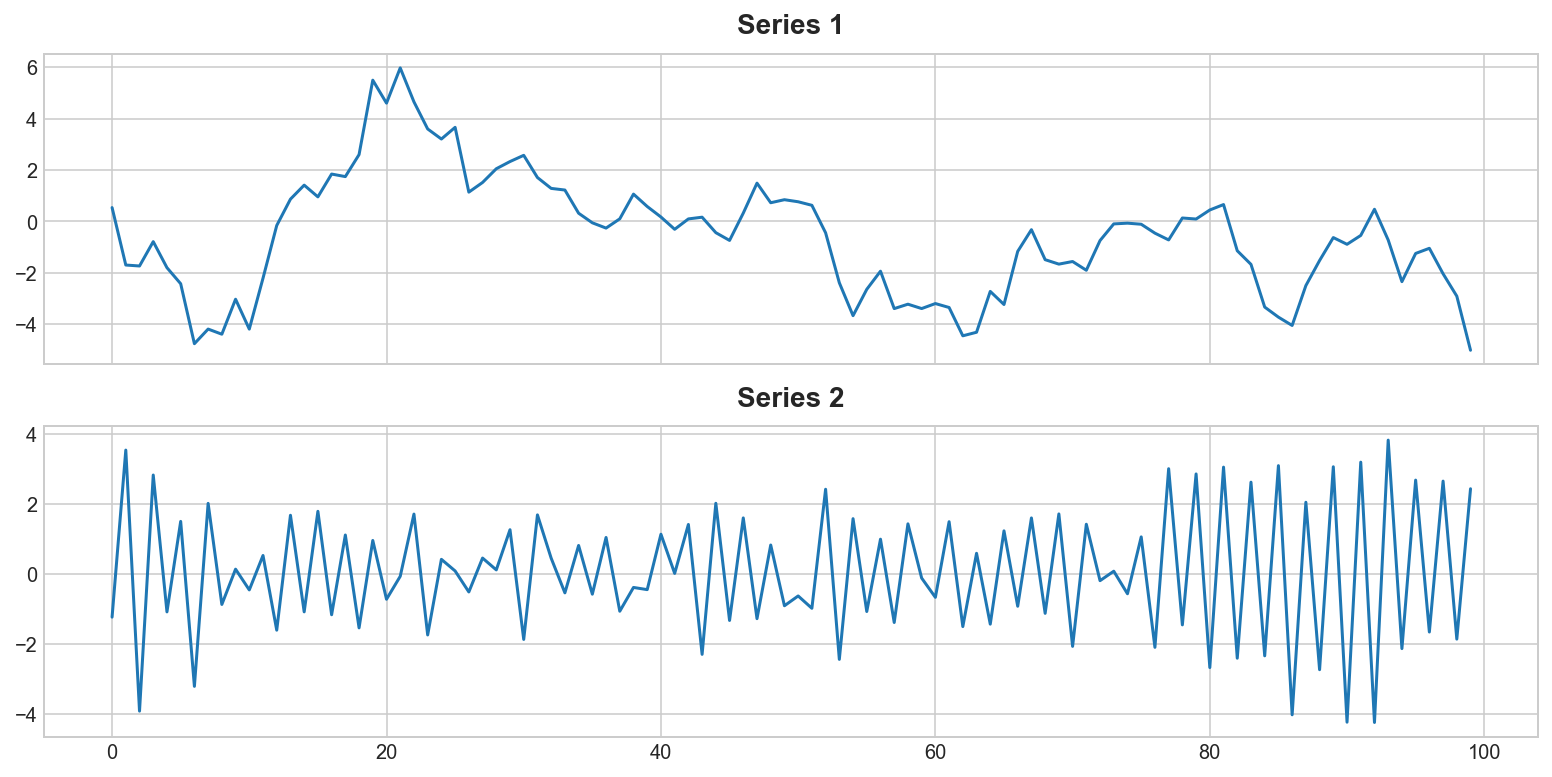

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 5.5), sharex=True)
ax1.plot(ar['ar1'])
ax1.set_title('Series 1')
ax2.plot(ar['ar2'])
ax2.set_title('Series 2')

One of these series has the equation `target = 0.95 * lag_1 + error` and the other has the equation `target = -0.95 * lag_1 + error`, differing only by the sign on the lag feature. Can you tell which equation goes with each series?

A: Series 1
The series with the 0.95 weight will tend to have values with signs that stay the same. The series with the -0.95 weight will tend to have values with signs that change back and forth.

### Fit a time-step feature

In [38]:
from sklearn.linear_model import LinearRegression

df = average_sales.to_frame()

# Create a time dummy
time = np.arange(len(df.index))
df['time'] = time

# Create training data
X = df.loc[:, ['time']]
y = df.loc[:, 'sales']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as the training data
y_pred = pd.Series(model.predict(X), index=X.index)

In [39]:
print(model.coef_)
print(model.intercept_)

[0.19434695]
194.23279019701053


Text(0.5, 1.0, 'Time Plot of Total Store Sales')

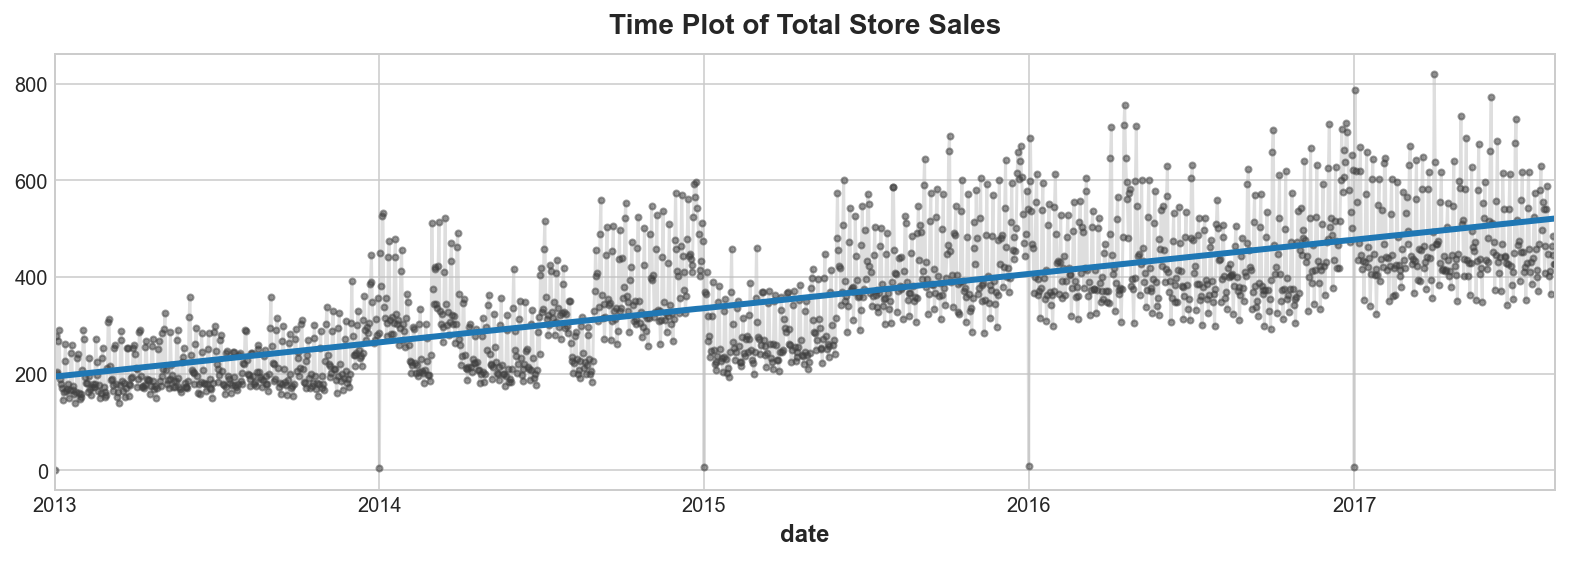

In [40]:
ax = y.plot(**plot_params, alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Total Store Sales')

### Fit a log feature to Store Sales

In [41]:
df = average_sales.to_frame()

lag_1 = df['sales'].shift(1)
df['lag_1'] = lag_1

X = df.loc[:, ['lag_1']].dropna()
y = df.loc[:, 'sales']
y, X = y.align(X, join='inner')

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

[None,
 Text(0, 0.5, 'Sales'),
 Text(0.5, 0, 'lag_1'),
 Text(0.5, 1.0, 'Lag Plot of Average Sales')]

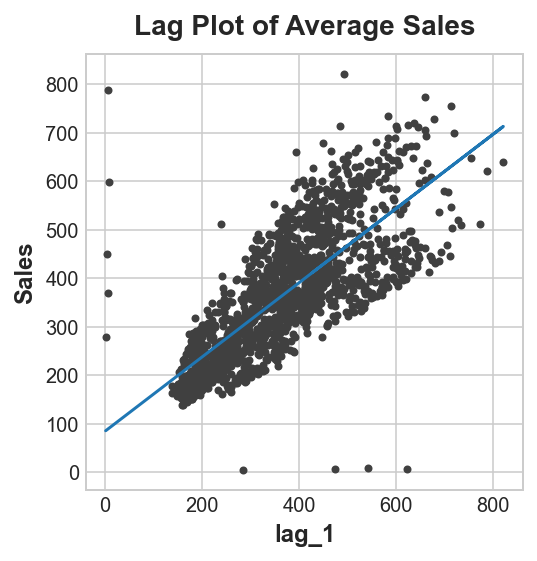

In [43]:
fig, ax = plt.subplots()
ax.plot(X['lag_1'], y, '.', color='0.25')
ax.plot(X['lag_1'], y_pred)
ax.set(aspect='equal', ylabel='Sales', xlabel='lag_1', title='Lag Plot of Average Sales')